# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [6]:
!git clone https://github.com/ds4e/wrangling.git

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 8), reused 5 (delta 5), pack-reused 45 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [49]:
import pandas as pd

airbnb = pd.read_csv('airbnb_hw.csv') # Read in data
airbnb.head(10) # Checking first 10 results

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270,90.0
9,2339,8/20/2008,Lovely 2 Bedroom East Village Nest,Manhattan,Apartment,95.0,Entire home/apt,10009.0,2.0,1,23,290,96.0


In [50]:
# Part 1

# Summary of Price variable
print(airbnb["Price"].describe())

# Remove commas and convert to integer
airbnb['Price'] = airbnb['Price'].str.replace(',', '').astype(int)

# Checking missing values
airbnb["Price"].isnull().sum()

print(airbnb["Price"].describe())

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object
count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


In [53]:
# Part 2

police = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv') # Read in data
police.head(10) # Checking first 10 results

obs = len(police) # Total observations
missing_obs = police["subject_injury"].isnull().sum() # Checking missing values

print(f"Proportion of missing values: {round(missing_obs/obs, 3)} \n")

# Replace NaN values with "Unknown"
police["subject_injury"] = police["subject_injury"].fillna("Unknown")
print(police["subject_injury"].value_counts(dropna=False), "\n")

# Cross tab
pd.crosstab(police["subject_injury"], police["force_type"])

# There doesn't seem to be a very stark pattern, however, it is of note that all
# cases concerning "maximal restraint technique" and "less lethal" result in an
# unknown outcome of subject_injury

Proportion of missing values: 0.762 

subject_injury
Unknown    9848
Yes        1631
No         1446
Name: count, dtype: int64 



force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Unknown,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [75]:
# Part 3
import numpy as np

justice = pd.read_parquet('/content/wrangling/assignment/data/justice_data.parquet')

print(justice["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False), "\n")

justice["WhetherDefendantWasReleasedPretrial"].isnull().sum() # 0 null values

# Replacing 9 with nan
justice["WhetherDefendantWasReleasedPretrial"] = justice["WhetherDefendantWasReleasedPretrial"].replace(["9"], np.nan)

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 



In [78]:
# Part 4

# Compare side-by-side
justice[["ImposedSentenceAllChargeInContactEvent", "SentenceTypeAllChargesAtConvictionInContactEvent"]].head(50)

justice["ImposedSentenceAllChargeInContactEvent"].unique()

# Replace blank spaces or non-numeric values with NaN
justice["ImposedSentenceAllChargeInContactEvent"] = justice["ImposedSentenceAllChargeInContactEvent"].replace(["", " "], np.nan)

# Convert column to numeric (forcing errors to NaN)
justice["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(justice["ImposedSentenceAllChargeInContactEvent"], errors='coerce')

# Round numbers and convert to integers
justice["ImposedSentenceAllChargeInContactEvent"] = justice["ImposedSentenceAllChargeInContactEvent"].round(0).astype("Int64")  # Int64 keeps NaNs

print(justice["ImposedSentenceAllChargeInContactEvent"].head(50))


0     <NA>
1       60
2       12
3        1
4     <NA>
5       12
6       36
7        6
8       24
9       12
10       6
11    <NA>
12    <NA>
13     120
14      24
15    <NA>
16    <NA>
17      12
18    <NA>
19      12
20      12
21    <NA>
22    <NA>
23      12
24    <NA>
25    <NA>
26    <NA>
27    <NA>
28      60
29      72
30      12
31      12
32    <NA>
33      12
34      12
35    <NA>
36    <NA>
37      60
38    <NA>
39      24
40      72
41      12
42      24
43      36
44      12
45    <NA>
46       0
47      24
48     120
49       3
Name: ImposedSentenceAllChargeInContactEvent, dtype: Int64


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

<Axes: xlabel='Year'>

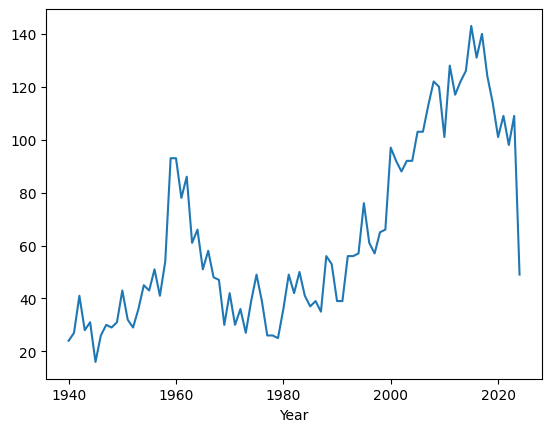

In [144]:
import seaborn as sns

shark = pd.read_excel("/GSAF5.xls")

# 2
shark = shark.drop(columns=["pdf", "href formula", "href", "Case Number", "Case Number.1", "original order", "Unnamed: 21", "Unnamed: 22"])

# 3
shark["Year"].describe() # The range is from 0 - 2026

shark = shark[(shark["Year"] > 1939) & (shark["Year"] < 2025)] # Only keeping observations 1940 until 2024
shark["Year"] = shark["Year"].astype(int)

attacks_per_year = shark["Year"].value_counts().sort_index()

sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values) # Plotting attacks over time
# Attacks seem to be increasing over time, however, there was a significant drop in 2024.

[69 48 40 '60+' '?' 57 24 45 61 27 38 16 33 30 15 23 41 14 26 'Middle age'
 21 49 25 46 19 20 65 64 '13' nan '11' '46' '32' '29' '10' '64' '62' '39'
 '22' '15' '16' '21' '66' '52' '20' '44' '26' '47' '55' '30' '59' '8' '50'
 '45' '34' '38' '30s' '37' '9' '19' '20/30' '35' '65' '20s' '77' '60' '49'
 '42' '!2' '24' '73' '25' '18' '50s' '58' '67' '17' '14' '6' '41' '53'
 '68' '43' '40' '51' '31' 39 58 51 17 10 13 60 28 '40s' 68 35 62 'teen' 8
 22 32 56 'Teen' 12 42 36 18 37 50 'M' 9 11 34 '!6' 31 '!!' 47 55 7 71 59
 53 54 75 '45 and 15' 73 52 29 70 4 63 44 '28 & 22' '22, 57, 31' '60s'
 "20's" 43 67 74 '9 & 60' 'a minor' 6 3 82 66 72 '23' '12' '36' '63' '71'
 '48' '70' '18 months' '57' '7' '28' '33' '61' '74' '27' '3' '56'
 '28 & 26' '5' '54' '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30'
 'Teens' 77 '36 & 26' '8 or 10' 84 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?'
 '33 or 37' 'mid-30s' '23 & 20' 5 ' 30' '7      &    31' ' 28' '20?'
 "60's" '69' '32 & 30' '16 to 18' '87' 'Elderly' 'mid-20s' 

<ipython-input-145-82b3c96569c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark["Age"] = shark["Age"].astype(int)


<Axes: xlabel='Age', ylabel='Count'>

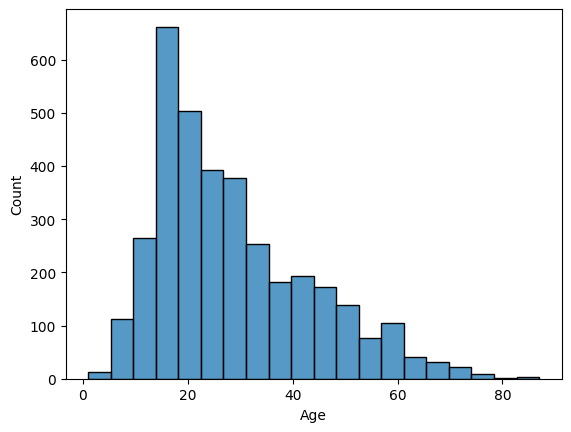

In [145]:
# 4
print(shark["Age"].unique(), "\n")

# Make every value a string
shark["Age"] = shark["Age"].astype(str).str.strip()

# Only keeping values that only contain digits
shark = shark[shark["Age"].str.isdigit()]

# Making values integers
shark["Age"] = shark["Age"].astype(int)

# Checking changes
print(shark["Age"].unique())

sns.histplot(data=shark, x="Age", bins=20, kde=False, edgecolor='black')

In [146]:
# 5

shark["Sex"].unique()
count = shark["Sex"].str.strip().value_counts()
print(count, "\n")
print("The proportion of attacks that were male are", round(count["M"] / (count["M"] + count["F"]), 2))

Sex
M      2976
F       543
lli       1
Name: count, dtype: int64 

The proportion of attacks that were male are 0.85


In [147]:
# 6

shark["Type"].unique()
shark["Type"].value_counts()

# If value isn't provoked or unprovoked, change to unknown
shark["Type"] = np.where(
    shark["Type"].isin(["Provoked", "Unprovoked"]),
    shark["Type"],
    "Unknown")

attack_type = shark["Type"].value_counts()

print("The proportion of attacks that were unprovoked:", round(attack_type["Unprovoked"] / (attack_type["Provoked"] + attack_type["Unprovoked"] + attack_type["Unknown"]), 2))

The proportion of attacks that were unprovoked: 0.83


In [154]:
# 7

shark['Fatal Y/N'].value_counts()

shark["Fatal Y/N"] = shark['Fatal Y/N'].astype(str).str.strip()

shark['Fatal Y/N'] = np.where(
    shark['Fatal Y/N'].isin(["N", "Y"]),
    shark['Fatal Y/N'],
    "Unknown")

shark['Fatal Y/N'].value_counts()

,count
Fatal Y/N,
N,2820
Y,516
Unknown,216


In [165]:
# 8

# Filter out rows where Sex is clearly 'Male' or 'Female'
df = shark[shark["Sex"].isin(["M", "F"])]

# Only looking at Provoked or Unprovoked
df_type = df[df["Type"].isin(["Provoked", "Unprovoked"])]

# Percentage attacks by Sex
type_attack_sex_percent = pd.crosstab(
    df_type["Type"], df_type["Sex"], normalize="index"
)
print("Attack type percentages by Sex: \n", type_attack_sex_percent, "\n")

# Unprovoked attacks are more likely to occur to men, however, women seem to be relatively more likely
# to be victims of unprovoked attacks compared to provoked attacks


# Percentages:
fatal_by_type_percent = pd.crosstab(
    df_type["Type"], df_type["Fatal Y/N"], normalize="index"
)
print("\nPercentage Fatal Attacks Type:\n", fatal_by_type_percent)

####### The attack is more likely to be fatal when it is unprovoked ###########

fatal_by_sex_percent = pd.crosstab(
    df_type["Sex"], df_type["Fatal Y/N"], normalize="index"
)
print("\nPercentage Fatal Attacks Sex:\n", fatal_by_sex_percent)

######## An attack is no more or less likely to be fatal based on sex ###########
######## Personally I feel no animosity towards sharks, they seem chill. #######

Attack type percentages by Sex: 
 Sex                F         M
Type                          
Provoked    0.073684  0.926316
Unprovoked  0.161941  0.838059 


Percentage Fatal Attacks Type:
 Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.964912  0.010526  0.024561
Unprovoked  0.832251  0.005466  0.162282

Percentage Fatal Attacks Sex:
 Fatal Y/N         N   Unknown         Y
Sex                                    
F          0.852525  0.006061  0.141414
M          0.842473  0.005889  0.151638


In [174]:
# 9

# Convert to string, make all lowercase, and split on whitespace
shark["Species "] = shark["Species "].fillna("").astype(str).str.lower()
species_splits = shark["Species "].str.split()

# Finds if the word white appears in each list
white_mask = species_splits.apply(lambda words: "white" in words)

proportion_white = white_mask.mean()  # Finds proportion
print(f"Proportion of attacks by white sharks: {proportion_white:.2%}")

Proportion of attacks by white sharks: 12.70%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

1. The most recent US Census used self identification to gather data on race

2. We gather these data for a couple important reasons. One is that the government needs it to enforce civil rights and ensure that there is no discrimination in areas like school, voting, or the workplace. Another important reason is to make sure each district, region, and state is getting fair representation in government since it's based off population. This also ties into how much public funding each area should be receiving for schools, roads, healthcare, and social services. For the reasons mentioned above it is abundantly clear that the data quality needs to be as good as possible.

3. I think the Census did well by allowing multiple race selections and giving space to write in detailed origins. However, the ethnicity question could be confusing for some people and there should be more options to choose form for race. For example, future censuses might combine race and ethnicity into one question, add categories like MENA (Middle Eastern or North African). Successful practices—such as multiple language options—should be adopted more widely.

4. The form asked only about Sex with no question on gender identity. This means transgender, nonbinary, or other gender-diverse people had no way to indicate their identities. A more inclusive approach could involve separate questions—one on sex assigned at birth and another on current gender identity—or adding more gender options, improving data completeness and respecting diverse identities.

5. Over cleaning of the data can override the self-identification portion of the Census or erase important nuances. Missing values pose a challenge, but guessing or forcing categories like inferring someone’s race from their name can perpetuate biases. Good practices might include being extra transparent about certain unknown variables or unreported cases and carefully preserving individual choices rather than imposing assumptions. Bad practices might drop ambiguous data altogether or apply stereotypical guesses, skewing results.

6. These algorithms could be very dangerous to the fabric of this country as they could misclassify people, reinforce stereotypes, and undermine the personal autonomy of self-identification. They also risk exacerbating discrimination if used for decisions in hiring, lending, or policing. Transparency, caution, and respect for individual privacy are essential when dealing with sensitive characteristics.